# Chap1 - Tensorflow 101

## Covered
- What is tensorflow ?
- 3 Models that make up tf ?
- `Session()` vs `InteractiveSession()`
- What is a tensor ?
- Syntax for:
    - constant
    - operation
    - placeholder
    - Variable
- placeholder vs variable
- How do you provide placeholder values when running ?
- `tf.convert_to_tensor()`
- How do you initialize variables ?
- Library functions for generating
    - 0, 1, value
    - sequence, range
    - distribution
- `tf.get_variable()` ?
- What do nodes and edges represent in the tf computational graph ?
- Tensorboard

## Notes

### What is TF? 
TensorFlow is an open source library for numerical computation using data flow graphs.

### 3 Parts to tf
- Data model comprises of tensors, that are the basic data units created,
manipulated, and saved in a TensorFlow program.
- Programming model comprises of data flow graphs or computation graphs.
Creating a program in TensorFlow means building one or more TensorFlow
computation graphs.
- Execution model consists of firing the nodes of a computation graph in a
sequence of dependence. The execution starts by running the nodes that are
directly connected to inputs and only depend on inputs being present.

### TensorFlow Core (9-24)
TensorFlow core is the lower level library on which the higher level TensorFlow modules are built.

#### Hello World

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tfs = tf.InteractiveSession()
hello = tf.constant("Hello World!")
print(tfs.run(hello))
print(hello.eval())

b'Hello World!'
b'Hello World!'


#### Interactive vs Session
The only difference between Session() and InteractiveSession() is
that the session created with InteractiveSession() becomes the
default session. Thus, we do not need to specify the session context to
execute the session-related command later. For example, say that we have
a session object, tfs, and a constant object, hello. If tfs is an
InteractiveSession() object, then we can evaluate hello with the
code hello.eval(). If tfs is a Session() object, then we have to
use either tfs.hello.eval() or a with block. The most common
practice is to use the with block, which will be shown later in this chapter.

**Tensors** are the basic elements of computation and a fundamental data structure in TensorFlow.  
A tensor is an n-dimensional collection of data, identified by rank, shape, and type.
Data types can be found [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType)

Python objects such as scalar values, lists, and NumPy arrays should be converted to tf data types
using `tf.convert_to_tensor()` function

#### Constants

In [3]:
tf.constant?

In [4]:
x=tf.constant(6, name='x', dtype=tf.float16)
x

<tf.Tensor 'x:0' shape=() dtype=float16>

In [5]:
y=tf.constant(1, name='y', shape=(2,3,), dtype=tf.int8)
y

<tf.Tensor 'y:0' shape=(2, 3) dtype=int8>

In [6]:
# To print the value we need to run the session
tfs.run([x,y])

[6.0, array([[1, 1, 1],
        [1, 1, 1]], dtype=int8)]

#### Operations

In [7]:
# Operations can be applied on tensors
z = tf.constant(5.0, dtype=tf.float16, name='z')
op1 = tf.add(z,x)
op1

<tf.Tensor 'Add:0' shape=() dtype=float16>

In [8]:
tfs.run(op1)

11.0

In [9]:
a = tf.constant([1,2,3])
b = tf.constant([10,20,30])
tfs.run(tf.tensordot(a,b, 0))

array([[10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]], dtype=int32)

In [10]:
tfs.run(tf.tensordot(a,b, 1))

140

In [11]:
tf.tensordot?

*There are a number of operations supported by `tf` please check the book page 14*

#### Placeholders

In [12]:
tf.placeholder?

In [13]:
p1 = tf.placeholder(name='p1', dtype=tf.int8)
p2 = tf.placeholder(name='p2', dtype=tf.int8)
print(p1)
print(p2)

Tensor("p1:0", dtype=int8)
Tensor("p2:0", dtype=int8)


In [14]:
tfs.run(p1*p2, feed_dict={p1:2,p2:4})

8

In [15]:
tfs.run(p1*p2, feed_dict={p1:[2,4],p2:[3,6]})

array([ 6, 24], dtype=int8)

**Properties**
- define input data that does not change over time
- no initial value needed

#### Creating tensors from python objects

In [16]:
tf.convert_to_tensor?

In [17]:
tf.convert_to_tensor(5.0, dtype=tf.float16)

<tf.Tensor 'Const_3:0' shape=() dtype=float16>

In [18]:
tf.convert_to_tensor(np.array([1,2,3,4]), dtype=tf.int8)

<tf.Tensor 'Const_4:0' shape=(4,) dtype=int8>

In [19]:
tf.constant([1,2,3,4], dtype=tf.int8)

<tf.Tensor 'Const_5:0' shape=(4,) dtype=int8>

#### Variables

**Properties**
- Hold values that are modified over time
- Initial value must be provided at definition time

In [20]:
tf.Variable?

**Linear Model**
y = W * x + b

In [21]:
w = tf.Variable([.3], dtype=tf.float16, name='W')
b = tf.Variable([.1], dtype=tf.float16, name='b')
x = tf.placeholder(dtype=tf.float16)
y = w * x + b
print(y)
print(w)
print(x)
print(b)

Tensor("add_1:0", dtype=float16)
<tf.Variable 'W:0' shape=(1,) dtype=float16_ref>
Tensor("Placeholder:0", dtype=float16)
<tf.Variable 'b:0' shape=(1,) dtype=float16_ref>


In [22]:
# for initializing only individual variables 
tfs.run(w.initializer)
# for initializing all variables
tf.global_variables_initializer().run()

In [23]:
tfs.run(y, feed_dict={x:3.0})

array([1.], dtype=float16)

#### Tensors generated from library functions

**Same Value**

In [24]:
tfs.run(tf.zeros((2,3)))

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [25]:
tfs.run(tf.zeros_like(tf.constant([1,2,3], dtype=tf.int8)))

array([0, 0, 0], dtype=int8)

In [26]:
tfs.run(tf.ones((3,2)))

array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [27]:
tf.ones_like?

In [28]:
tfs.run(tf.fill((3,3), 5.9))

array([[5.9, 5.9, 5.9],
       [5.9, 5.9, 5.9],
       [5.9, 5.9, 5.9]], dtype=float32)

**Sequence**

In [29]:
tfs.run(tf.lin_space(start=1.0, stop=20, num=8))

array([ 1.       ,  3.7142856,  6.428571 ,  9.142857 , 11.857142 ,
       14.571428 , 17.285713 , 20.       ], dtype=float32)

In [30]:
tfs.run(tf.range(start=1, limit=20, delta=2))

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19], dtype=int32)

**Distribution**

In [31]:
tfs.run(tf.random_normal((3,2), mean=5, stddev=2))

array([[5.0027256, 5.765345 ],
       [2.6579704, 5.95561  ],
       [2.7444394, 5.3808722]], dtype=float32)

In [32]:
tfs.run(tf.random_uniform((2,3), minval=9, maxval=25))

array([[23.44773 , 23.084251, 17.542177],
       [11.832636, 17.936024, 16.226501]], dtype=float32)

#### Getting variables

In [33]:
# You will get an error if you create a variable with the same name
# tf.variable_scope.reuse_variable()
# tf.get_variable(name='W', initializer=[.3])

### Data flow graph or computational graph (25-33)

Computation graph is made up of 
- Nodes - `tf.Operation`
- Edges - `tf.Tensor`

Two kinds of opertions are performed on the graph
- Building
- Running

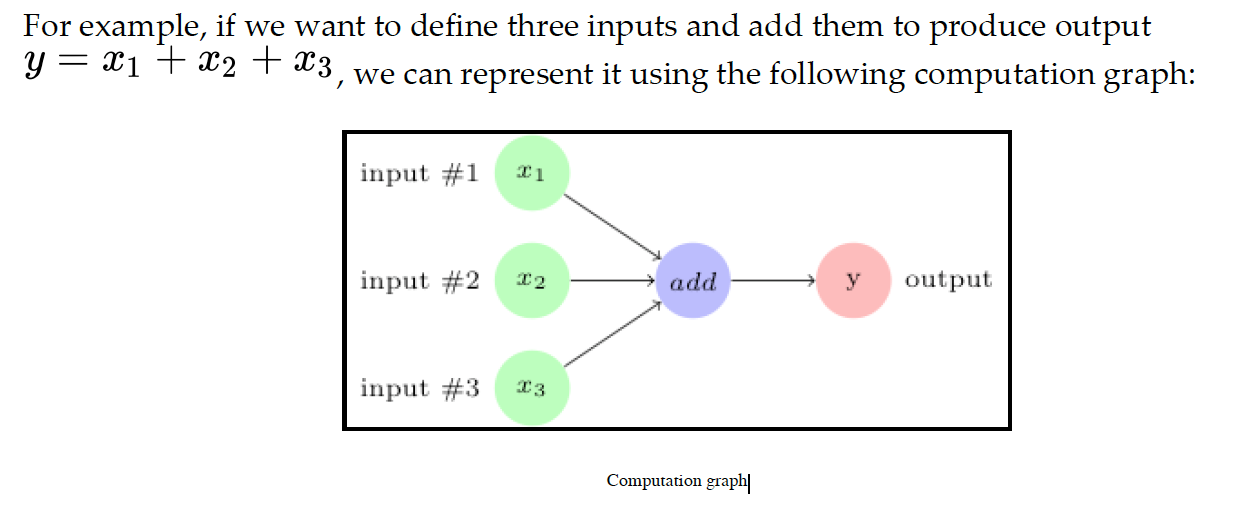

In [34]:
# tf.add(x1 + x2 + x3)

In [35]:
# Use the with block so the session is closed automatically
with tf.Session() as tfs:
    tf.constant(1, dtype=tf.int8)


Order of execution is done with lazy loading. Hence only nodes that are needed for the next and evalauted before

In [36]:
# View all CPU and GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5110043028571827010
]


You can place graph nodes on specific compute devices - Refer page 29

Creating multiple graphs is not recommended since you would need multiple sessions to run them and each session consumes a lot of resource

In [37]:
# It is recommended to create sub-graphs within the main graph
g = tf.Graph()
with g.as_default():
    w = tf.constant(10, dtype=tf.int16)
    x = tf.constant(20, dtype=tf.int16)
    
with tf.Session(graph=g) as tfs:
    print(tfs.run(w*x))

200


### TensorBoard (33-37)

In [2]:
# Let us visualize the below graph
w = tf.Variable([.3], dtype=tf.float16, name='W')
b = tf.Variable([-.3], dtype=tf.float16, name='b')
x = tf.placeholder(dtype=tf.float16, name='x')
y = w * x + b

In [3]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    # Use summary to attach what you want to analyse
    writer=tf.summary.FileWriter('tf.logs', tfs.graph)
    print(tfs.run(y, feed_dict={x:3}))


[0.6006]


In [ ]:
!tensorboard --logdir='tf.logs'

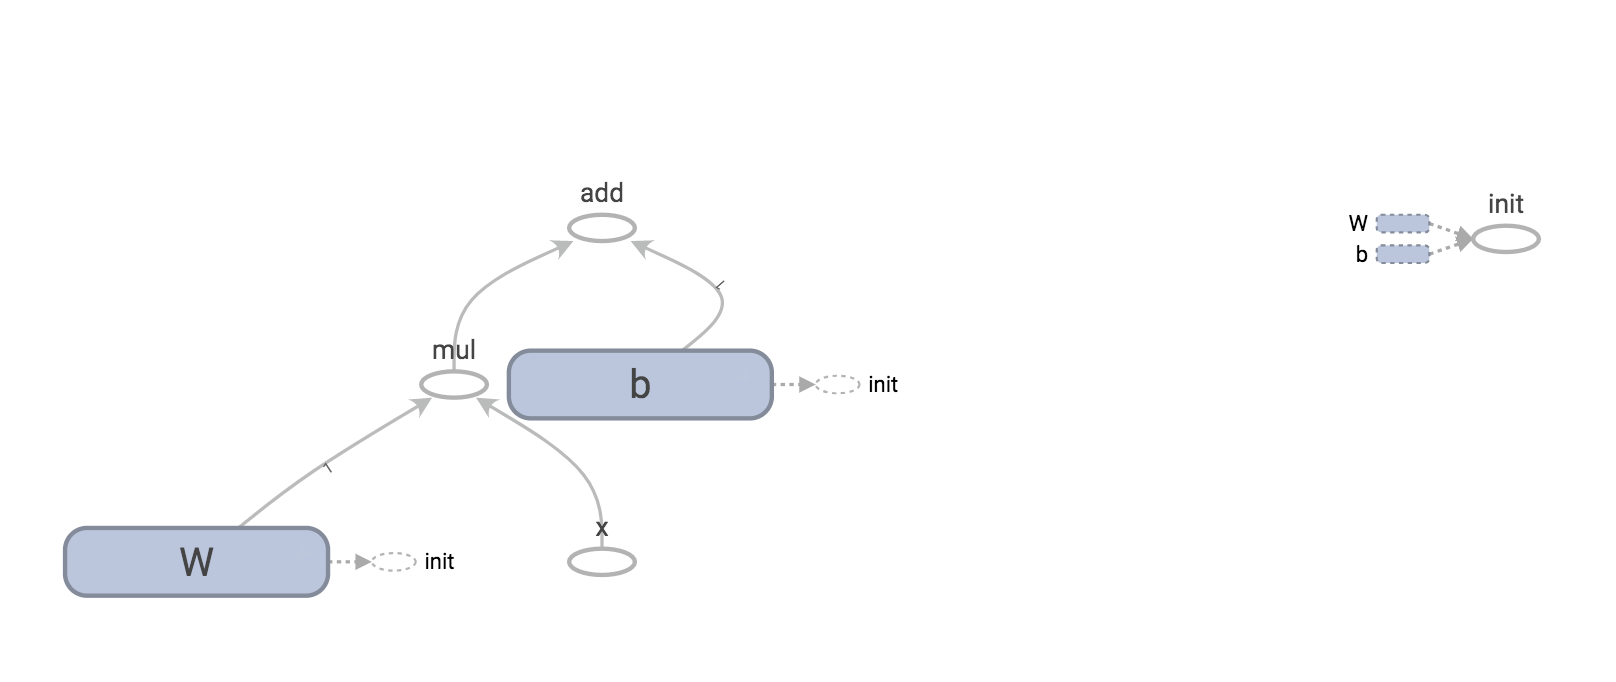